<a href="https://colab.research.google.com/github/deepto123/Basic-Image-Classification-with-TensorFlow./blob/main/01_Student_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Copy to Drive](https://drive.google.com/uc?id=11wOaLj4fiI6m665H5xmqrJyt3Qc_dD2E)


### Import TensorFlow

In [ ]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


# Task 2: The Dataset
### Import MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### Shapes of Imported Arrays

In [ ]:
print('x-train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x-test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x-train shape: (60000, 28, 28)
y_train shape: (60000,)
x-test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image Example

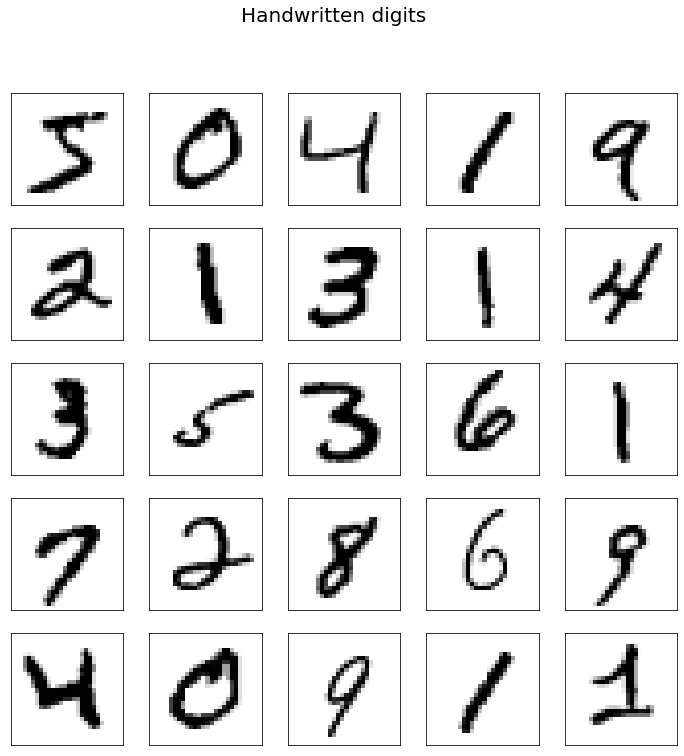

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

# visualizing first 25 images from our dataset

plt.figure(figsize=(12,12))
for i, img in enumerate(x_train[0:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img,cmap='binary')
    plt.suptitle("Handwritten digits", fontsize=20)
plt.show()


### Display Labels

In [ ]:
for i in y_train[0:25]:
  print(i, end=' ')

5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)


### Validated Shapes

In [ ]:
y_train_encoded.shape

(60000, 10)

In [ ]:
print('y_train_encoded_shape:',y_train.shape)
print('y_test_encoded_shape:',y_test.shape)

y_train_encoded_shape: (60000,)
y_test_encoded_shape: (10000,)


### Display Encoded Labels

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Copy to Drive](https://drive.google.com/uc?id=1c4vKs7QWGQdhUtnu6yzeEjnbSuaGNbvK)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?


![Copy to Drive](https://drive.google.com/uc?id=1fsrqlkIEnsOwOtnHDME2MtdXbHTgCUgA)

### Neural Networks

![Copy to Drive](https://drive.google.com/uc?id=1SvJQ7-gP8A8NhzuKm-HMoT5dLWUCwFg5)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [ ]:
import numpy as np

x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

print('x_train_reshaped:',x_train_reshaped.shape)
print('x_test_reshaped:',x_test_reshaped.shape)

x_train_reshaped: (60000, 784)
x_test_reshaped: (10000, 784)


### Display Pixel Values

In [ ]:
print(x_train_reshaped[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### Data Normalization

In [ ]:
x_train_mean=np.mean(x_train_reshaped)
x_train_std=np.std(x_train_reshaped)

epsilon=1e-10

x_train_norm=(x_train_reshaped-x_train_mean)/(x_train_std+epsilon)
x_test_norm=(x_test_reshaped-x_train_mean)/(x_train_std+epsilon)

# when the standard deviation becomes too small,the normalised value can go very high and out of bounds, so we add epsilon as a little compensation so
# that normalised values dont go out of bounds. Also carefully note that epsilon is nor very large to actually affect the real normalied values

### Display Normalized Pixel Values

In [ ]:
print(x_train_norm[0])

[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0

In [ ]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#for sequential models we dont need an input layer
#we have 128 hidden units in our dense layers
#'relu' is a simple linear activation function when input values are +ve and 0 when values are negative...'softmax' gives probabiistic output
model=Sequential([
                  Dense(128,activation='relu',input_shape=(784,)),
                  Dense(128,activation='relu'),
                  Dense(10,activation='softmax')
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

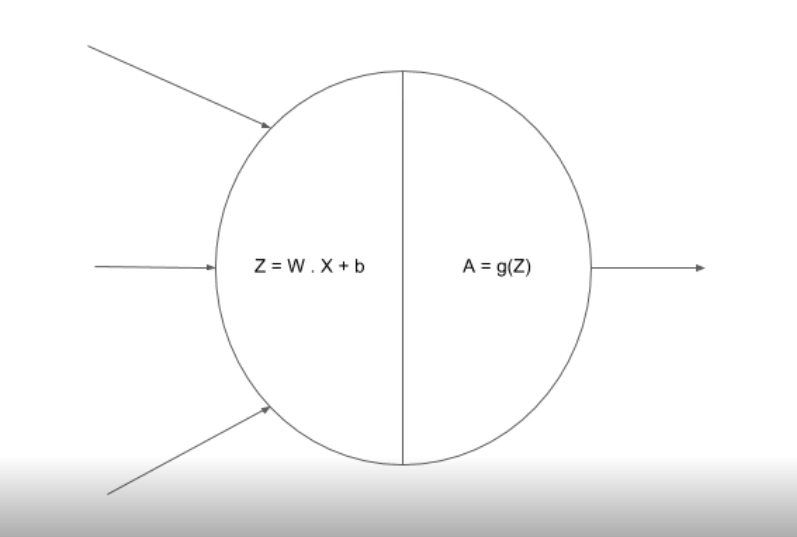

### Compiling the Model

In [ ]:
model.compile(
    optimizer='sgd', #stochastic gradient descent
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

#no of parameters of each model=(hidden input nodes)*(outputs of previous layer)+no of biases...for ex in dense=128*784+128....in dense1=128*128+128...in dense2=10*128+10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [ ]:
model.fit(x_train_norm,y_train_encoded,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3675 - accuracy: 0.8930
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1817 - accuracy: 0.9467
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1366 - accuracy: 0.9602
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1116 - accuracy: 0.9679
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0936 - accuracy: 0.9730


### Evaluating the Model

In [ ]:
_,accuracy=model.evaluate(x_test_norm,y_test_encoded)

print('Test set accuracy:',accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9695
Test set accuracy: 96.95000052452087


# Task 8: Predictions

### Predictions on Test Set

In [ ]:
preds=model.predict(x_test_norm)

print("Shape of predicted:",preds.shape)

Shape of predicted: (10000, 10)


### Plotting the Results

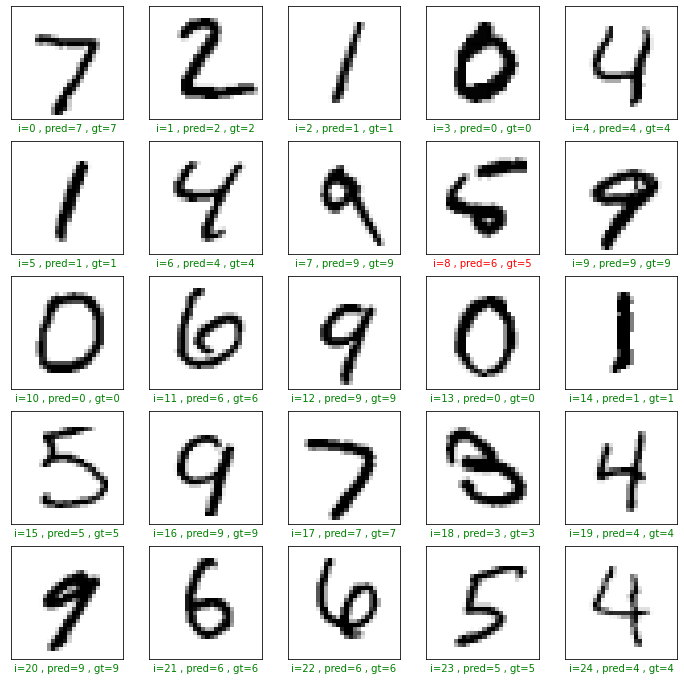

In [ ]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col='g'
    if pred != gt:
        col='r'
    
    plt.xlabel('i={} , pred={} , gt={}'.format(start_index+i , pred , gt),color = col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()   
  